Распознавание цифр на изображении
(MNIST digits classification dataset).   
Нейросеть должна состоять из пяти полносвязных слоёв,
обязательное использование ActivityRegularization, в качестве
оптимизатора использовать RMSprop.


In [25]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras import utils
from tensorflow.keras.regularizers import *
from tensorflow.keras.preprocessing import image
import numpy as np

In [52]:
classes = [str(i) for i in range(10)]
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train / 255
x_test = x_test / 255
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

In [90]:
model = Sequential()
model.add(Dense(800, input_dim=784, activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(ActivityRegularization(l1=0.001))
model.add(Dense(110, activation='relu'))
model.add(ActivityRegularization(l1=0.001))
model.add(Dense(len(classes), activation='softmax'))
model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 800)               628000    
_________________________________________________________________
dense_37 (Dense)             (None, 400)               320400    
_________________________________________________________________
activity_regularization_7 (A (None, 400)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 110)               44110     
_________________________________________________________________
activity_regularization_8 (A (None, 110)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 10)                1110      
Total params: 993,620
Trainable params: 993,620
Non-trainable params: 0
_______________________________________________

In [91]:
model.fit(x=x_train, y=y_train, batch_size=200, epochs=15, validation_split=0.2)

Epoch 1/15
240/240 [==============================] - 2s 5ms/step - loss: 0.6531 - accuracy: 0.8344 - val_loss: 0.1994 - val_accuracy: 0.9631
Epoch 2/15
240/240 [==============================] - 1s 4ms/step - loss: 0.1606 - accuracy: 0.9745 - val_loss: 0.1403 - val_accuracy: 0.9755
Epoch 3/15
240/240 [==============================] - 1s 4ms/step - loss: 0.0971 - accuracy: 0.9862 - val_loss: 0.1328 - val_accuracy: 0.9743
Epoch 4/15
240/240 [==============================] - 1s 4ms/step - loss: 0.0693 - accuracy: 0.9918 - val_loss: 0.1097 - val_accuracy: 0.9771
Epoch 5/15
240/240 [==============================] - 1s 4ms/step - loss: 0.0544 - accuracy: 0.9939 - val_loss: 0.1139 - val_accuracy: 0.9753
Epoch 6/15
240/240 [==============================] - 1s 4ms/step - loss: 0.0436 - accuracy: 0.9956 - val_loss: 0.0995 - val_accuracy: 0.9785
Epoch 7/15
240/240 [==============================] - 1s 4ms/step - loss: 0.0350 - accuracy: 0.9962 - val_loss: 0.1006 - val_accuracy: 0.9776
Epoch 

In [92]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("Error: %.2f%%" % (100 - scores[1] * 100))

Error: 2.13%


In [93]:
L=len(y_test)
correct = 0
fail = 0
YP=model.predict(x_test)
for i in range(L):
  if np.argmax(y_test[i]) == np.argmax(YP[i]):
    correct += 1
  else:
   fail += 1
print(f'Out of {L}, {correct} are correct.')
print(f'Accuracy: {correct / (correct + fail) * 100}%')

Out of 10000, 9787 are correct.
Accuracy: 97.87%


In [105]:
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import files
files.upload()

Saving 3.PNG to 3.PNG


{'3.PNG': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\xa3\x00\x00\x00\xa4\x08\x06\x00\x00\x00\xfbi\x9e8\x00\x00\x00\x01sRGB\x00\xae\xce\x1c\xe9\x00\x00\x00\x04gAMA\x00\x00\xb1\x8f\x0b\xfca\x05\x00\x00\x00\tpHYs\x00\x00\x0e\xc3\x00\x00\x0e\xc3\x01\xc7o\xa8d\x00\x00$\xbdIDATx^\xed\xdd\x07\x98^E\xd5\x07\xf0(U\x14BG\xf1\x93\xa2\x80b\xa4\x8bT\t\x9d\xd0AA\xa4\xa8\x94\x80\xb4P\x02J\x12\x08%\x91"M:R\x14B\x80\x80\xd2\x03\x81\x10D\xa4\xf7*\x86\x14$\xf4\xde{s\xbe\xfd\x9d0\xcb\xcdfI!\x9b\xdd\xbb\x9b9\xcf\xf3\x7f\xf6\xcd\xee\x9b\xf7\xbdw\xee\x7f\xce\xcc\xa9\xd3\xe9\xaf\x7f\xfdk\xfa\xd5\xaf~\x95\x0e8\xe0\x80t\xc8!\x87\xa4C\x0f=\xb4\xa0\xa0\xd5\xd0\xb7o\xdf\xb4\xf7\xde{\xa7\x9dw\xde9u:\xf6\xd8c\xd36\xdbl\x93.\xbc\xf0\xc24t\xe8\xd0t\xc3\r7\x14\x14\xb4\x1a\x86\x0c\x19\x92\xfe\xf4\xa7?\xa5_\xfe\xf2\x97\xa9\xd3n\xbb\xed\x96\xe0\xf1\xc7\x1fO\xef\xbf\xff~\xfa\xe4\x93O\n\nZ\r\xef\xbc\xf3N\xfa\xc7?\xfe\x91~\xfb\xdb\xdf\xa6N\x18\xb9\xeb\xae\xbb\xa6\'\x9ex"}\xf4\xd1G\xa9H\x91\xd6\x14\n\xf0\x9f\xff\xfc\xe

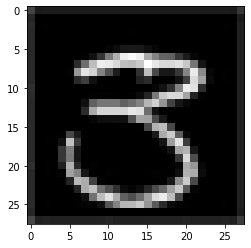

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
This is number: 3


In [117]:
img = Image.open('3.PNG').convert('L').resize((28, 28), Image.ANTIALIAS)
img = np.array(img)
plt.imshow(img, cmap = plt.cm.binary)
plt.show()
img = np.reshape(img,(1,784));
img = np.array([256-x for x in img])
y_pred = model.predict(img)
print(y_pred)
print(f'This is number: {np.argmax(y_pred[0])}')